In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

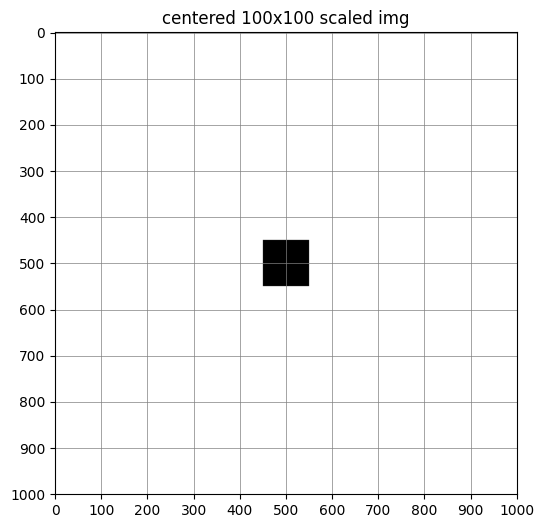

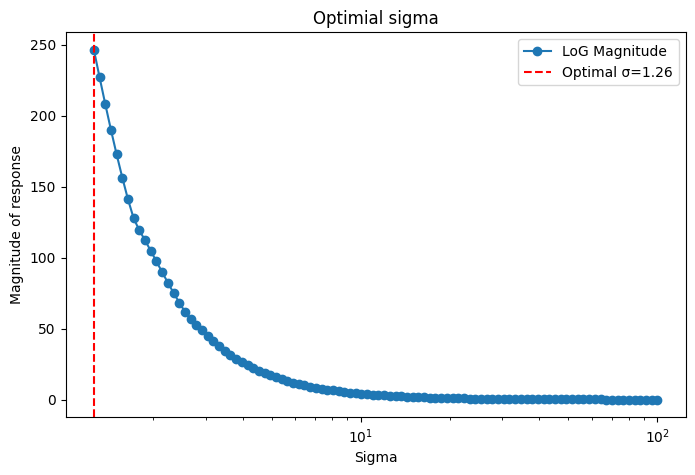

Optimal sigma found: 1.26


In [21]:

#size for the square
img_size = 1000
square_size = 100

image = np.ones((img_size, img_size), dtype=np.float32) * 255
#creating white back

start = (img_size - square_size) // 2
end = start + square_size
image[start:end, start:end] = 0
image_uint8 = image.astype(np.uint8)


plt.figure(figsize=(6, 6))
plt.imshow(image_uint8, cmap='gray', vmin=0, vmax=255)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(0, img_size + 1, 100))
plt.yticks(np.arange(0, img_size + 1, 100))
plt.title("centered 100x100 scaled img")
plt.show()

#large sampling
sigma_values = np.logspace(0.1, 2, num=100)
response_magnitudes = []

#logFilter for diff values
for sigma in sigma_values:
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    log_response = cv2.Laplacian(blurred.astype(np.float64), cv2.CV_64F, ksize=3)
    magnitude = np.max(np.abs(log_response))
    response_magnitudes.append(magnitude)


optimal_sigma = sigma_values[np.argmax(response_magnitudes)]

plt.figure(figsize=(8, 5))
plt.plot(sigma_values, response_magnitudes, marker='o', linestyle='-', label="LoG Magnitude")
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Magnitude of response')
plt.title('Optimial sigma')
plt.axvline(optimal_sigma, color='r', linestyle='--', label=f'Optimal σ={optimal_sigma:.2f}')
plt.legend()
plt.show()

print(f"Optimal sigma found: {optimal_sigma:.2f}")
